# NB - Tiktok

In [3]:
import sys
import os
import pandas as pd

# Agregar el directorio raiz al PYTHONPATH
module_path = os.path.abspath(os.path.join('../..'))
if module_path not in sys.path:
    sys.path.append(module_path)

Importar modelo NB y cargar datos

In [4]:
from src.trainers.train_nb import train_nb
from src.trainers.utils import build_datasets, save_metrics
from constants.constants_twitter import TWITTER_DATASET_TRAIN_PATH

dataset_train, dataset_test, dataset_val = build_datasets(
    TWITTER_DATASET_TRAIN_PATH,
    test_size=0.3,
    val_size=0.5, # 0.5 de 0.3    
    random_state=42
)
print(dataset_train.shape)
print(dataset_test.shape)
print(dataset_val.shape)

(36924, 2)
(7913, 2)
(7912, 2)


## Hiperparámetros

In [5]:
import numpy as np

list_vectorizers = ["tfidf", "bow"]
list_alpha = np.logspace(-4, -1, 20)
print(list_alpha)

[0.0001     0.00014384 0.00020691 0.00029764 0.00042813 0.00061585
 0.00088587 0.00127427 0.00183298 0.00263665 0.00379269 0.00545559
 0.0078476  0.01128838 0.01623777 0.02335721 0.03359818 0.0483293
 0.06951928 0.1       ]


## Entrenar modelos

In [6]:
from constants.constants_twitter import NB_PIPELINE_PATH, TWITTER_NB_METRICS_PATH
from src.trainers.utils import save_model

best_accuracy = -1
for vectorizer in list_vectorizers:
    for alpha in list_alpha:
        pipeline, metrics = train_nb(
            dataset_train,
            dataset_val,
            alpha=alpha,
            vec=vectorizer
        )
        print(f"NB {vectorizer} {alpha}: {metrics['accuracy']}")
        save_metrics(metrics, TWITTER_NB_METRICS_PATH)
        if metrics['accuracy'] > best_accuracy:
            save_model(pipeline, NB_PIPELINE_PATH)
            

NB tfidf 0.0001: 0.8032103134479271
Modelo guardado en: c:\Users\Diego\Desktop\sentiment_analysis\models\twitter\classifiers\nb_pipeline.pkl
NB tfidf 0.0001438449888287663: 0.8033367037411526
Modelo guardado en: c:\Users\Diego\Desktop\sentiment_analysis\models\twitter\classifiers\nb_pipeline.pkl
NB tfidf 0.00020691380811147902: 0.8030839231547017
Modelo guardado en: c:\Users\Diego\Desktop\sentiment_analysis\models\twitter\classifiers\nb_pipeline.pkl
NB tfidf 0.00029763514416313193: 0.8032103134479271
Modelo guardado en: c:\Users\Diego\Desktop\sentiment_analysis\models\twitter\classifiers\nb_pipeline.pkl
NB tfidf 0.00042813323987193956: 0.8029575328614762
Modelo guardado en: c:\Users\Diego\Desktop\sentiment_analysis\models\twitter\classifiers\nb_pipeline.pkl
NB tfidf 0.0006158482110660267: 0.8030839231547017
Modelo guardado en: c:\Users\Diego\Desktop\sentiment_analysis\models\twitter\classifiers\nb_pipeline.pkl
NB tfidf 0.0008858667904100823: 0.8030839231547017
Modelo guardado en: c:\Us

## Modelo con mayor accuracy

In [7]:
# Seleccionar los hiperparámetros que generan mayor accuracy
df_metrics = pd.read_csv(TWITTER_NB_METRICS_PATH)

best_acc = df_metrics.loc[df_metrics['accuracy'].idxmax()]
print(best_acc)

accuracy      0.803337
recall        0.803335
precision     0.804112
f1_score      0.803205
model               NB
vectorizer       tfidf
alpha         0.000144
vocab_size       11819
train_time    0.413751
Name: 1, dtype: object


Cargando modelo: c:\Users\Diego\Desktop\sentiment_analysis\models\twitter\classifiers\nb_pipeline.pkl

Naive Bayes
Reporte de clasificacion
              precision    recall  f1-score   support

           0       0.81      0.75      0.78      2834
           1       0.71      0.81      0.75      2306
           2       0.80      0.76      0.78      2773

    accuracy                           0.77      7913
   macro avg       0.77      0.77      0.77      7913
weighted avg       0.77      0.77      0.77      7913

Matriz de confusión


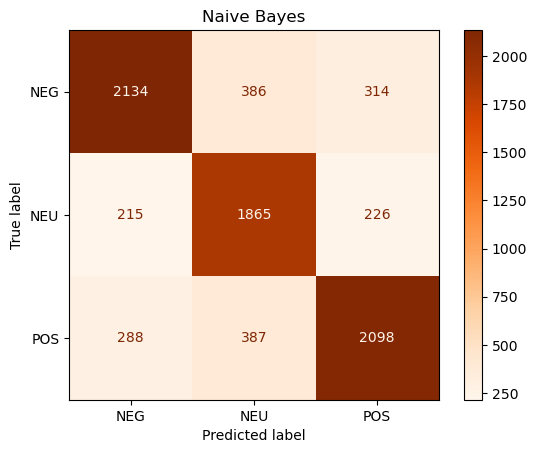

{'accuracy': 0.7705042335397447,
 'recall': 0.770509129762313,
 'precision': 0.7727801237697073,
 'f1_score': 0.7700068548601888}

In [8]:
from src.trainers.utils import evaluate_model
from src.trainers.utils import load_model

# Evaluar modelo con datos de prueba
pipeline = load_model(NB_PIPELINE_PATH)
metrics = evaluate_model(pipeline, dataset_test, title="Naive Bayes")
display(metrics)

## Test

In [ ]:
from constants.constants_nlp import INDEX_TO_POLARITY
from src.preprocesamiento.clean import clean_text
from src.preprocesamiento.nlp_spacy import preprocesamiento

textos_test = ["i'm study hard", "i'm happy"]
textos_test = list(map(lambda x: clean_text(x, "en"), textos_test))
textos_test = preprocesamiento(textos_test, stemming=True, lang="en")

preds = pipeline.predict(textos_test)
for input, pred in zip(textos_test,preds):
    print(f"{input}: {INDEX_TO_POLARITY[pred]}")

Modelo cargado: en_core_web_sm
Aplicando stemming...
Total de documentos preprocesados: 3
m studi hard: NEU
m happi: POS
sorri: NEU
